In [1]:
# Python Dependencies
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA



In [2]:
# read in and clean Constituent Data
constituent_data = pd.read_csv('constituents_sh.csv')


constituent_data.rename(columns={
    'Constituent type': 'constituent_type',
    'First gift amount': 'first_gift_amount',
    'Constituent codes': 'constituent_codes',
    'Lifetime giving': 'lifetime_giving',
    'First gift type': 'first_gift_type',
    'First gift date': 'first_gift_date',
    'First gift fund': 'first_gift_fund',
    'Latest gift amount': 'latest_gift_amount',
    'Latest gift date': 'latest_gift_date',
    'Latest gift fund': 'latest_gift_fund',
    'Greatest gift amount': 'greatest_gift_amount',
    'Greatest gift type': 'greatest_gift_type',
    'Greatest gift date': 'greatest_gift_date',
    'Greatest gift fund': 'greatest_gift_fund',
    'Marital status': 'marital_status',
    'Solicit codes': 'solicit_codes',
    'Student Organizations': 'student_organizations',
    'Fraternal Organizations': 'fraternal_organizations',
    "Men's Athletics": 'mens_athletics',
    "Scholarship Recipient": 'scholarship_recipient',
    "Women's Athletics": 'womens_athletics'
}, inplace=True)

# Remove rows where 'first_gift_date' is null
constituent_data_cleaned = constituent_data.dropna(subset=['first_gift_date'])

constituent_data_cleaned.head()

,ConstituentID,City,State,Postcode,Country,constituent_type,constituent_codes,lifetime_giving,first_gift_amount,first_gift_type,...,Education,Gender,marital_status,solicit_codes,student_organizations,Arts,fraternal_organizations,mens_athletics,scholarship_recipient,womens_athletics
1,43735,Hermantown,MN,55811-1755,United States,Organization,Other Organizations (8/29/2012 - No end date),50,50,One-time gift,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,60145,Esko,MN,55733-9645,United States,Organization,Other Organizations (No start date - No end date),50,50,One-time gift,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,21332,NaN,NaN,NaN,United States,Organization,Business (No start date - No end date),25,25,One-time gift,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,21351,NaN,NaN,NaN,United States,Organization,Business (No start date - No end date),125,125,One-time gift,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,36583,Superior,WI,54880-2934,United States,Organization,Business (No start date - No end date),450,50,One-time gift,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# read in and clean Gift Data
gift_data = pd.read_csv('gifts_sh.csv')

gift_data.rename(columns={
    'Gift ID': 'gift_ID',
    'Is anonymous': 'is_anonymous',
    'Gift subtype': 'gift_subtype',
    'Gift constituency': 'gift_constituency',
    'Payment method': 'payment_method',
    'Online Gift': 'online_gift',
    "Superior Fund": 'Superior_fund'
}, inplace=True)

# Remove rows where 'Type' is pledge
gift_data_cleaned = gift_data[gift_data['Type'] != 'Pledge']

# Export the cleaned DataFrame to a CSV file
gift_data_cleaned.to_csv('cleaned_gift_data.csv', index=False)


C:\Users\sohof\AppData\Local\Temp\ipykernel_8348\1378609545.py:2: DtypeWarning: Columns (9,12,13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  gift_data = pd.read_csv('gifts_sh.csv')


In [4]:
# merge data
combined_data = pd.merge(constituent_data_cleaned, gift_data_cleaned, on='ConstituentID', how='inner')

In [5]:
# export .csv
combined_data.to_csv('merged_data.csv', index=False)

In [6]:
# only alumni
# 'constituent_codes' contains the word 'alumni'
alumni_data = combined_data[combined_data['constituent_codes'].str.contains('alumni', case=False, na=False)]

# Check the result
alumni_data.head()

,ConstituentID,City,State,Postcode,Country,constituent_type,constituent_codes,lifetime_giving,first_gift_amount,first_gift_type,...,Amount,Fund,Campaign,Appeal,gift_subtype,gift_constituency,payment_method,Package,online_gift,Superior_fund
14,44089,Mesa,AZ,85205-5437,United States,Individual,Alumni (No start date - No end date),350,300,Pledge,...,250,Men's Basketball Fund,Annual,Champions Club,Credit Card,Alumni,Credit card,NaN,NaN,NaN
15,44089,Mesa,AZ,85205-5437,United States,Individual,Alumni (No start date - No end date),350,300,Pledge,...,100,Men's Basketball Fund,Annual,Locker Stall Wrap - Basketball,Credit Card,Alumni,Credit card,NaN,NaN,NaN
19,39070,Elk Mound,WI,54739-9298,United States,Individual,Alumni (No start date - No end date),52,52,One-time gift,...,52,Superior Fund,Annual,2010-11 Phone-a-Thon,NaN,Alumni,Other,Fall 2010-11 Calling Program,NaN,NaN
87,15605,Tarpon Springs,FL,34689-7537,United States,Individual,Alumni (No start date - No end date),"1,300.00",50,Pledge,...,100,Superior Fund,Annual,2013-2014 Fall Direct Mail,NaN,Alumni,Personal check,NaN,NaN,NaN
88,15605,Tarpon Springs,FL,34689-7537,United States,Individual,Alumni (No start date - No end date),"1,300.00",50,Pledge,...,100,Superior Fund,Annual,2012-2013 Fall Direct Mail,NaN,Alumni,Personal check,NaN,NaN,NaN


In [7]:
columns_to_clean = ['Amount', 'first_gift_amount', 'lifetime_giving', 
                    'latest_gift_amount', 'greatest_gift_amount']

for col in columns_to_clean:
    alumni_data[col] = alumni_data[col].replace({',': ''}, regex=True).astype(float)

C:\Users\sohof\AppData\Local\Temp\ipykernel_8348\3231155824.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alumni_data[col] = alumni_data[col].replace({',': ''}, regex=True).astype(float)
C:\Users\sohof\AppData\Local\Temp\ipykernel_8348\3231155824.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alumni_data[col] = alumni_data[col].replace({',': ''}, regex=True).astype(float)
C:\Users\sohof\AppData\Local\Temp\ipykernel_8348\3231155824.py:5: SettingWithCopyWarning: 
A value is trying to be set on a co

In [8]:
# Extract the last 4 digits as graduation year
alumni_data['graduation_year'] = alumni_data['Education'].str.extract(r'(\d{4})').fillna('0000')

# Convert 'graduation_year' to numeric (optional, if needed for further analysis)
alumni_data['graduation_year'] = pd.to_numeric(alumni_data['graduation_year'], errors='coerce', downcast='integer')

# For missing years (NaNs after conversion), fill with 0 or '0000'
alumni_data['graduation_year'] = alumni_data['graduation_year'].fillna(0).astype(int)

# Remove the last 4 digits (year) from the 'Education' column
alumni_data['Education'] = alumni_data['Education'].str.replace(r',\d{4}$', '', regex=True)

# Check the result
print(alumni_data[['Education', 'graduation_year']].head())


                                      Education  graduation_year
14    UW-Superior,Primary,Physical Education,BS             2013
15    UW-Superior,Primary,Physical Education,BS             2013
19  UW-Superior,Primary,Elementary Education,BS             2007
87               UW-Superior,Primary,Physics,BS             1974
88               UW-Superior,Primary,Physics,BS             1974


C:\Users\sohof\AppData\Local\Temp\ipykernel_8348\925635325.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alumni_data['graduation_year'] = alumni_data['Education'].str.extract(r'(\d{4})').fillna('0000')
C:\Users\sohof\AppData\Local\Temp\ipykernel_8348\925635325.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alumni_data['graduation_year'] = pd.to_numeric(alumni_data['graduation_year'], errors='coerce', downcast='integer')
C:\Users\sohof\AppData\Local\Temp\ipykernel_8348\925635325.py:8: SettingWithC

In [9]:
# Extract everything after the last comma as 'degree'
alumni_data['degree'] = alumni_data['Education'].str.split(',').str[-1].str.strip()

# Remove everything after the last comma (including the comma itself) from the 'Education' column
alumni_data['Education'] = alumni_data['Education'].str.rsplit(',', n=1).str[0].str.strip()

# Check the result
print(alumni_data[['Education', 'degree']].head())


                                   Education degree
14    UW-Superior,Primary,Physical Education     BS
15    UW-Superior,Primary,Physical Education     BS
19  UW-Superior,Primary,Elementary Education     BS
87               UW-Superior,Primary,Physics     BS
88               UW-Superior,Primary,Physics     BS


C:\Users\sohof\AppData\Local\Temp\ipykernel_8348\4217375281.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alumni_data['degree'] = alumni_data['Education'].str.split(',').str[-1].str.strip()
C:\Users\sohof\AppData\Local\Temp\ipykernel_8348\4217375281.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alumni_data['Education'] = alumni_data['Education'].str.rsplit(',', n=1).str[0].str.strip()


In [10]:
# Replace 'female' with 1, 'male' with 2
alumni_data['Gender'] = alumni_data['Gender'].replace({'Unknown': 0, 'Female': 1, 'Male': 2})

# Replace missing values (NaN or empty) with 0
alumni_data['Gender'] = alumni_data.replace({'': np.nan})['Gender'].fillna(0)

# Check the result
print(alumni_data['Gender'].value_counts())


C:\Users\sohof\AppData\Local\Temp\ipykernel_8348\4018833858.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alumni_data['Gender'] = alumni_data['Gender'].replace({'Unknown': 0, 'Female': 1, 'Male': 2})


Gender
2    16787
1    12083
0       15
Name: count, dtype: int64


C:\Users\sohof\AppData\Local\Temp\ipykernel_8348\4018833858.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alumni_data['Gender'] = alumni_data.replace({'': np.nan})['Gender'].fillna(0)


In [11]:
# Update marital_status
alumni_data['marital_status'] = alumni_data['marital_status'].replace({'Unknown': 0, 'Married': 1, 'Single': 2, 'Divorced': 3, 'Widowed': 4, 'Engaged': 5, 'Separated': 6})

# Replace missing values (NaN or empty) with 0
alumni_data['marital_status'] = alumni_data['marital_status'].fillna(0)

# If the column contains empty strings instead of NaNs, handle that too
alumni_data['marital_status'] = alumni_data['marital_status'].replace('', 0)

# Check the result
print(alumni_data['marital_status'].value_counts())

marital_status
1.0    20467
0.0     4506
4.0     2150
3.0     1016
2.0      739
5.0        5
6.0        2
Name: count, dtype: int64


C:\Users\sohof\AppData\Local\Temp\ipykernel_8348\2025983742.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alumni_data['marital_status'] = alumni_data['marital_status'].replace({'Unknown': 0, 'Married': 1, 'Single': 2, 'Divorced': 3, 'Widowed': 4, 'Engaged': 5, 'Separated': 6})
C:\Users\sohof\AppData\Local\Temp\ipykernel_8348\2025983742.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alumni_data['marital_status'] = alumni_data['marital_status'].fillna(0)
C:\Users\sohof\AppData\Local\Temp\ipykernel_

In [12]:
# Ensure both NaN and empty strings are treated as missing values
alumni_data['student_organizations'] = np.where(alumni_data['student_organizations'].fillna('') == '', 0, 1)

# Check the result
print(alumni_data['student_organizations'].value_counts())



student_organizations
0    21998
1     6887
Name: count, dtype: int64


C:\Users\sohof\AppData\Local\Temp\ipykernel_8348\2793093797.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alumni_data['student_organizations'] = np.where(alumni_data['student_organizations'].fillna('') == '', 0, 1)


In [13]:
# Ensure both NaN and empty strings are treated as missing values
alumni_data['mens_athletics'] = np.where(alumni_data['mens_athletics'].fillna('') == '', 0, 1)

# Check the result
print(alumni_data['mens_athletics'].value_counts())


mens_athletics
0    25182
1     3703
Name: count, dtype: int64


C:\Users\sohof\AppData\Local\Temp\ipykernel_8348\1526854508.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alumni_data['mens_athletics'] = np.where(alumni_data['mens_athletics'].fillna('') == '', 0, 1)


In [14]:
# Ensure both NaN and empty strings are treated as missing values
alumni_data['fraternal_organizations'] = np.where(alumni_data['fraternal_organizations'].fillna('') == '', 0, 1)

# Check the result
print(alumni_data['fraternal_organizations'].value_counts())


fraternal_organizations
0    22916
1     5969
Name: count, dtype: int64


C:\Users\sohof\AppData\Local\Temp\ipykernel_8348\1889735079.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alumni_data['fraternal_organizations'] = np.where(alumni_data['fraternal_organizations'].fillna('') == '', 0, 1)


In [15]:
# Ensure both NaN and empty strings are treated as missing values
alumni_data['scholarship_recipient'] = np.where(alumni_data['scholarship_recipient'].fillna('') == '', 0, 1)

# Check the result
print(alumni_data['scholarship_recipient'].value_counts())


scholarship_recipient
0    22027
1     6858
Name: count, dtype: int64


C:\Users\sohof\AppData\Local\Temp\ipykernel_8348\3254289727.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alumni_data['scholarship_recipient'] = np.where(alumni_data['scholarship_recipient'].fillna('') == '', 0, 1)


In [16]:
# Ensure both NaN and empty strings are treated as missing values
alumni_data['womens_athletics'] = np.where(alumni_data['womens_athletics'].fillna('') == '', 0, 1)

# Check the result
print(alumni_data['womens_athletics'].value_counts())


womens_athletics
0    28124
1      761
Name: count, dtype: int64


C:\Users\sohof\AppData\Local\Temp\ipykernel_8348\731041417.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alumni_data['womens_athletics'] = np.where(alumni_data['womens_athletics'].fillna('') == '', 0, 1)


In [17]:
# Ensure both NaN and empty strings are treated as missing values
alumni_data['Arts'] = np.where(alumni_data['Arts'].fillna('') == '', 0, 1)

# Check the result
print(alumni_data['Arts'].value_counts())


Arts
0    27227
1     1658
Name: count, dtype: int64


C:\Users\sohof\AppData\Local\Temp\ipykernel_8348\3307423335.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alumni_data['Arts'] = np.where(alumni_data['Arts'].fillna('') == '', 0, 1)


In [18]:
# save the updated DataFrame to the same CSV file
alumni_data.to_csv('alumni_data.csv', index=False)

In [19]:
# Handle missing Age (e.g., dropping rows with missing Age)
alumni_data_cleaned = alumni_data.dropna(subset=['Age'])

## Gifts to Any Fund

In [21]:
# Group by 'ConstituentID' and sum the 'Amount' of donations per constituent
# Retain other relevant features, like age, latest gift amount, etc.
donors_grouped = alumni_data_cleaned.groupby('ConstituentID').agg({
    'Amount': 'sum',  # Sum all the donation amounts per constituent
    'first_gift_amount': 'first',  # Keep the first entry found
    'latest_gift_amount': 'first',  # Keep the first entry found
    'greatest_gift_amount': 'first',  # Keep the first entry found
    'Age': 'first', # Keep the first entry found
    'Gender': 'first', # Keep the first entry found
    'lifetime_giving': 'first', # Keep the first entry found
    'first_gift_date': 'first', # Keep the first entry found
    'latest_gift_date': 'first', # Keep the first entry found
    'greatest_gift_date': 'first', # Keep the first entry found
    'marital_status': 'first', # Keep the first entry found
    'Arts': 'first', # Keep the first entry found
    'student_organizations': 'first', # Keep the first entry found
    'fraternal_organizations': 'first', # Keep the first entry found
    'mens_athletics': 'first', # Keep the first entry found
    'scholarship_recipient': 'first', # Keep the first entry found
    'womens_athletics': 'first' # Keep the first entry found
}).reset_index()

In [22]:
# Select features for PCA
numeric_columns = [
    'Age', 'Gender', 'marital_status', 'Arts',
    'student_organizations', 'fraternal_organizations', 
    'mens_athletics', 'scholarship_recipient', 'womens_athletics'
]

# Filter the selected columns
selected_features_all_funds = donors_grouped[numeric_columns]

# Standardize the data
scaler = StandardScaler()
scaled_data_all_funds = scaler.fit_transform(selected_features_all_funds)

# Check the result
print(scaled_data_all_funds[:5])  # Print the first 5 rows of the standardized data

[[ 0.68388226  1.02353798 -1.17534677 -0.19765971  2.52010549 -0.31446112
  -0.39965688 -0.65854124 -0.27816945]
 [ 0.43833819  1.02353798 -1.17534677 -0.19765971 -0.39680879 -0.31446112
  -0.39965688  1.51850779 -0.27816945]
 [-0.4824521   1.02353798  3.44983328 -0.19765971 -0.39680879 -0.31446112
   2.50214632 -0.65854124 -0.27816945]
 [ 1.05219838  1.02353798 -0.01905176 -0.19765971  2.52010549 -0.31446112
  -0.39965688 -0.65854124 -0.27816945]
 [ 0.62249624 -0.96718872  2.29353827 -0.19765971 -0.39680879 -0.31446112
  -0.39965688  1.51850779 -0.27816945]]


In [73]:
# Apply PCA
pca = PCA(n_components=5)  # Started with 2 components, shifted to 5 after running Cumulative Explained Variance test
pca_components = pca.fit_transform(scaled_data_all_funds)

# Explained variance
explained_variance = pca.explained_variance_ratio_
print(f'Explained variance by each component: {explained_variance}')

Explained variance by each component: [0.20167039 0.17043637 0.14128701 0.10035535 0.09764192]


In [75]:
# Get feature loadings (components)
loadings = pd.DataFrame(pca.components_, columns=numeric_columns, index=[f'PC{i+1}' for i in range(pca.n_components_)])
print("PCA Component Loadings:")
print(loadings)

PCA Component Loadings:
          Age    Gender  marital_status      Arts  student_organizations  \
PC1  0.555603  0.235181        0.315666  0.082986               0.170114   
PC2  0.197595 -0.615709        0.230586  0.211284               0.082723   
PC3 -0.201291  0.089892       -0.029999  0.559732               0.604827   
PC4 -0.126633  0.030362       -0.227313  0.177729              -0.068026   
PC5 -0.283809 -0.024201        0.860656 -0.141880              -0.100368   

     fraternal_organizations  mens_athletics  scholarship_recipient  \
PC1                 0.463305        0.029792              -0.306886   
PC2                 0.142352       -0.623932               0.010485   
PC3                 0.265097        0.247297               0.327769   
PC4                 0.193261        0.122394              -0.790439   
PC5                 0.017488        0.295539              -0.032421   

     womens_athletics  
PC1         -0.436815  
PC2          0.259884  
PC3          0.18033

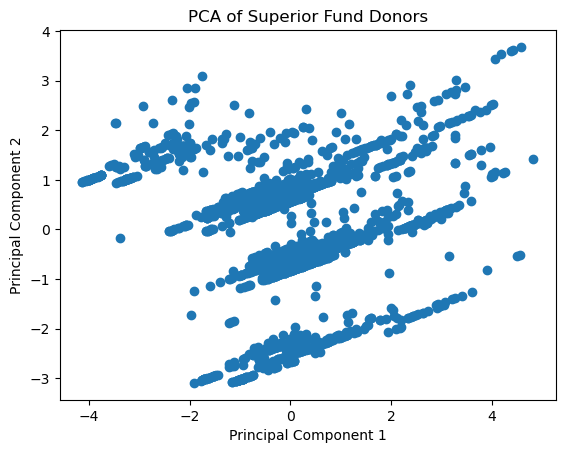

In [77]:
# Visualize the PCA result (scatter plot of the first two principal components)
plt.scatter(pca_components[:, 0], pca_components[:, 1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Superior Fund Donors')
plt.show()

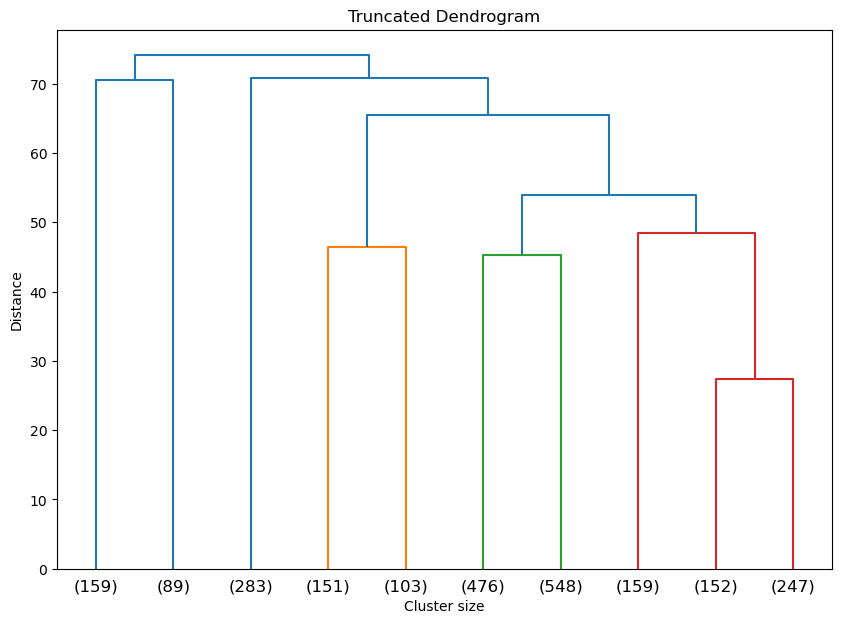

In [79]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Use Ward's method for hierarchical clustering
Z = linkage(scaled_data_all_funds, method='ward')

# Truncate the dendrogram to show only the top clusters
plt.figure(figsize=(10, 7))
dendrogram(Z, truncate_mode='lastp', p=10)  # Show only the last 10 merged clusters
plt.title('Truncated Dendrogram')
plt.xlabel('Cluster size')
plt.ylabel('Distance')
plt.show()


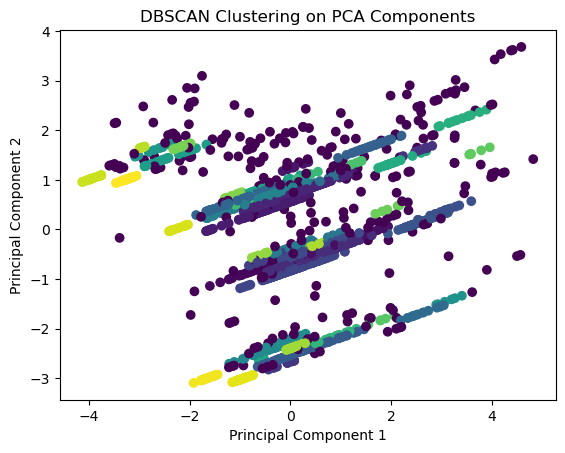

In [81]:
from sklearn.cluster import DBSCAN

# Apply DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(scaled_data_all_funds)

# Visualize the results (if applicable)
plt.scatter(pca_components[:, 0], pca_components[:, 1], c=dbscan_labels, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('DBSCAN Clustering on PCA Components')
plt.show()

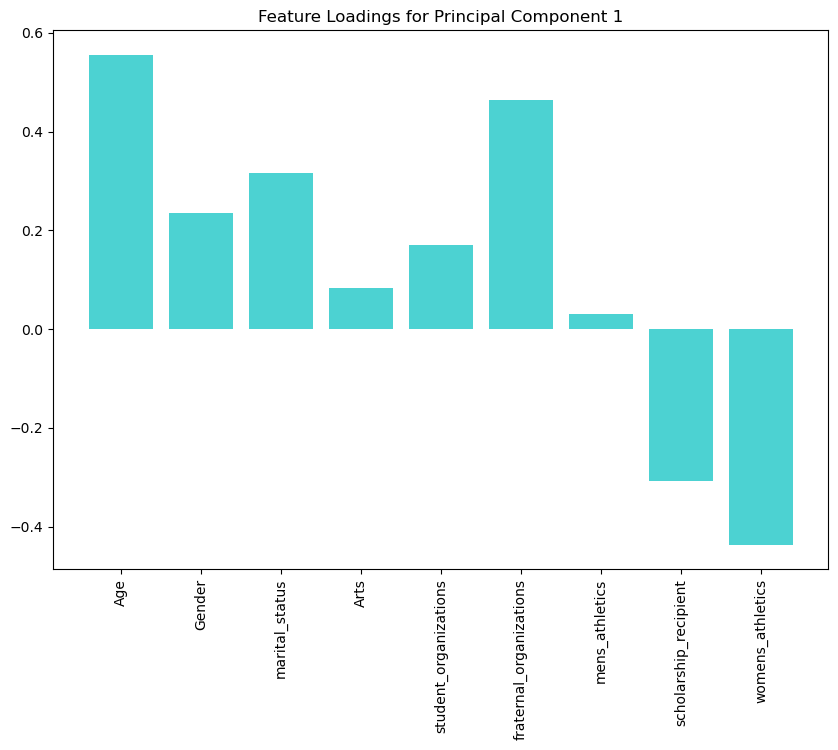

In [83]:
# Visualize the feature loadings
plt.figure(figsize=(10, 7))
plt.bar(loadings.columns, loadings.iloc[0], color='c', alpha=0.7)
plt.xticks(rotation=90)
plt.title('Feature Loadings for Principal Component 1')
plt.show()

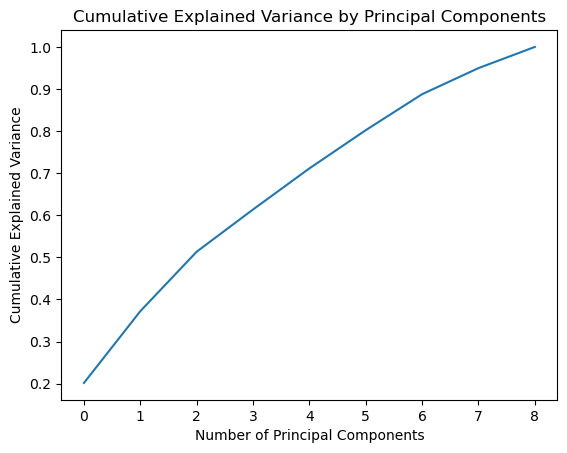

In [85]:
# Apply PCA with more components
pca_full = PCA()
pca_full.fit(scaled_data_all_funds)

# Plot the cumulative explained variance
plt.plot(np.cumsum(pca_full.explained_variance_ratio_))
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance by Principal Components')
plt.show()


C:\Users\sohof\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\sohof\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=10.
  warnings.warn(
C:\Users\sohof\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\sohof\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environm

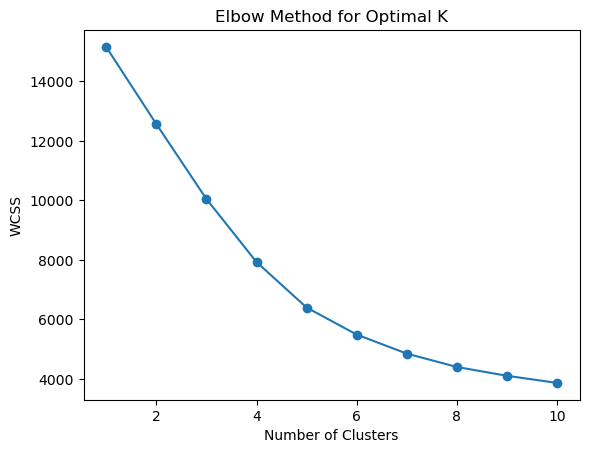

C:\Users\sohof\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\sohof\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=10.
  warnings.warn(


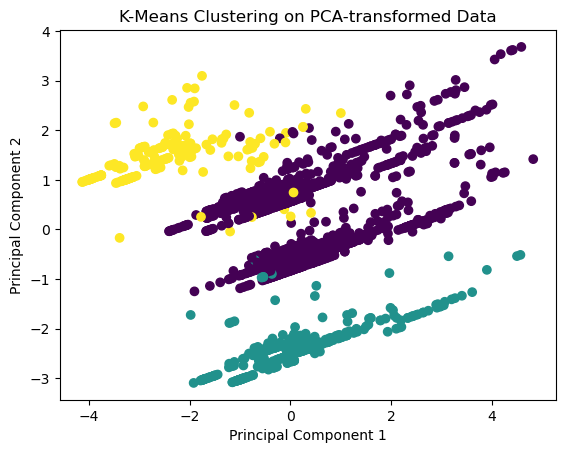

In [87]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Step 1: Use the Elbow Method to find the optimal number of clusters
wcss = []  # Within-cluster sum of squares
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(pca_components)
    wcss.append(kmeans.inertia_)  # Inertia is the sum of squared distances to the nearest cluster center

# Plot the Elbow Method result
plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal K')
plt.show()

# Step 2: Choose a reasonable number of clusters (e.g., 3 based on the elbow method) and fit K-Means
kmeans = KMeans(n_clusters=3, random_state=42)  # Adjust the number of clusters based on the elbow method result
kmeans.fit(pca_components)

# Get the cluster labels
cluster_labels = kmeans.labels_

# Step 3: Visualize the clusters
plt.scatter(pca_components[:, 0], pca_components[:, 1], c=cluster_labels, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-Means Clustering on PCA-transformed Data')
plt.show()

# Step 4: Add the cluster labels to your dataset (optional)
donors_grouped['Cluster'] = cluster_labels


## Predict High Lifetime Donors - $1000 or more (Removing greatest gift amount bc it act as a direct proxy for high lifetime giving, potentially overshadowing other interesting features. Clearer picture of which demographic or engagement-related features - like age, involvement in student organizations, etc. - are driving the model's predictions.)

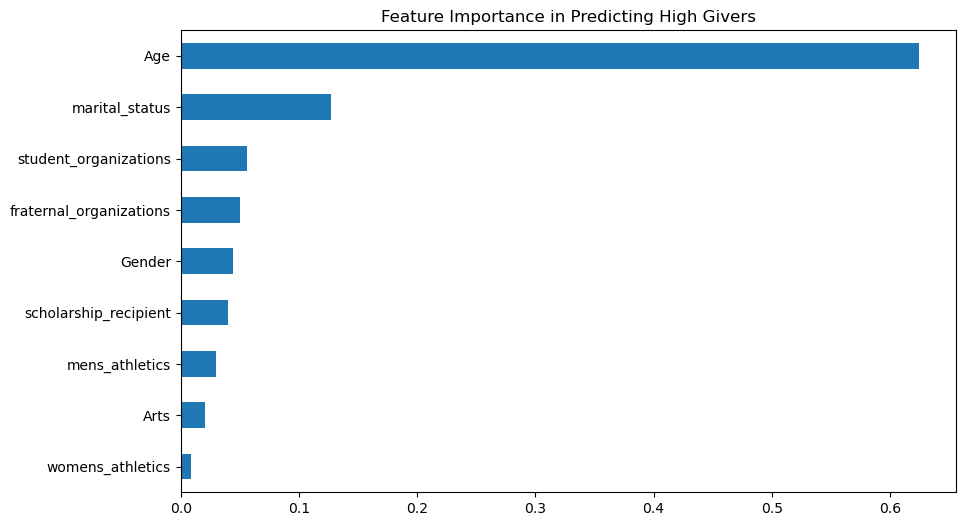

Random Forest Test Accuracy: 0.82
Confusion Matrix:
[[563  44]
 [ 82  22]]
Precision: 0.33
Recall: 0.21
F1 Score: 0.26


In [89]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import pandas as pd

# Step 1: Define the threshold for high lifetime giving
threshold = 1000

# Create a binary target for high givers
donors_grouped['High_Giver_1k'] = donors_grouped['lifetime_giving'].apply(lambda x: 1 if x > threshold else 0)

# Step 2: Select specific features to include in the analysis
features = [
    'Age', 'Gender', 'marital_status', 'Arts',
    'student_organizations', 'fraternal_organizations', 
    'mens_athletics', 'scholarship_recipient', 'womens_athletics'
]

X = donors_grouped[features]  # Select the specified features
y = donors_grouped['High_Giver_1k']  # Target: 1 = high giver, 0 = low giver

# Step 3: Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 4: Train the Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Step 5: Check feature importance
importances = rf.feature_importances_
feature_importance = pd.Series(importances, index=X.columns)

# Plot the feature importance
plt.figure(figsize=(10, 6))
feature_importance.sort_values().plot(kind='barh')
plt.title('Feature Importance in Predicting High Givers')
plt.show()

# Step 6: Evaluate the model on the test set
test_score = rf.score(X_test, y_test)
print(f'Random Forest Test Accuracy: {test_score:.2f}')

# Step 7: Confusion Matrix and Additional Metrics

# Predict on the test set
y_pred = rf.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(cm)

# Precision
precision = precision_score(y_test, y_pred)
print(f'Precision: {precision:.2f}')

# Recall
recall = recall_score(y_test, y_pred)
print(f'Recall: {recall:.2f}')

# F1 Score
f1 = f1_score(y_test, y_pred)
print(f'F1 Score: {f1:.2f}')



In [92]:
print(feature_importance)  # This will show you the importance of each encoded feature


Age                        0.624445
Gender                     0.043857
marital_status             0.126989
Arts                       0.020117
student_organizations      0.055879
fraternal_organizations    0.049927
mens_athletics             0.029973
scholarship_recipient      0.039869
womens_athletics           0.008944
dtype: float64


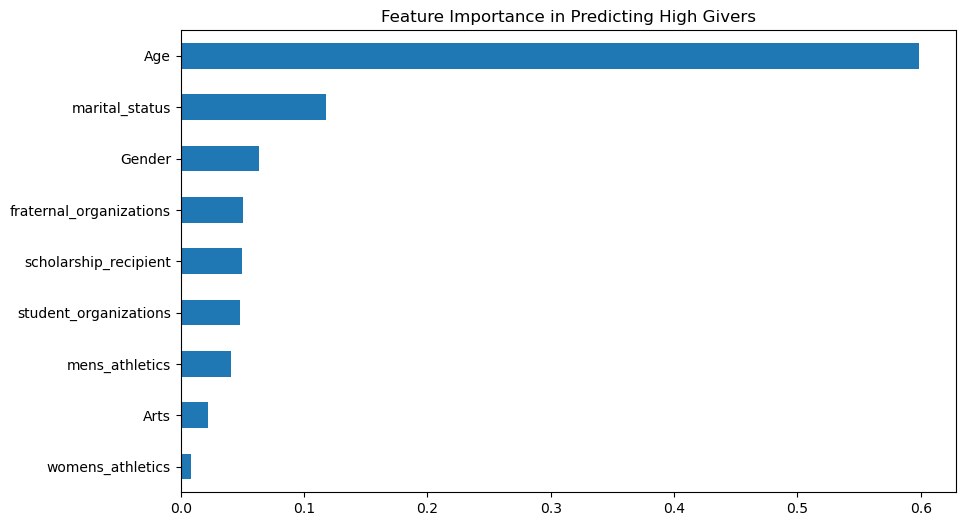

Random Forest Test Accuracy: 0.94
Confusion Matrix:
[[662   9]
 [ 36   4]]
Precision: 0.31
Recall: 0.10
F1 Score: 0.15


In [94]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import pandas as pd

# Step 1: Define the threshold for high lifetime giving
threshold = 5000

# Create a binary target for high givers
donors_grouped['High_Giver_5k'] = donors_grouped['lifetime_giving'].apply(lambda x: 1 if x > threshold else 0)

# Step 2: Select specific features to include in the analysis
features = [
    'Age', 'Gender', 'marital_status', 'Arts',
    'student_organizations', 'fraternal_organizations', 
    'mens_athletics', 'scholarship_recipient', 'womens_athletics'
]

X = donors_grouped[features]  # Select the specified features
y = donors_grouped['High_Giver_5k']  # Target: 1 = high giver, 0 = low giver

# Step 3: Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 4: Train the Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Step 5: Check feature importance
importances = rf.feature_importances_
feature_importance = pd.Series(importances, index=X.columns)

# Plot the feature importance
plt.figure(figsize=(10, 6))
feature_importance.sort_values().plot(kind='barh')
plt.title('Feature Importance in Predicting High Givers')
plt.show()

# Step 6: Evaluate the model on the test set
test_score = rf.score(X_test, y_test)
print(f'Random Forest Test Accuracy: {test_score:.2f}')

# Step 7: Confusion Matrix and Additional Metrics

# Predict on the test set
y_pred = rf.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(cm)

# Precision
precision = precision_score(y_test, y_pred)
print(f'Precision: {precision:.2f}')

# Recall
recall = recall_score(y_test, y_pred)
print(f'Recall: {recall:.2f}')

# F1 Score
f1 = f1_score(y_test, y_pred)
print(f'F1 Score: {f1:.2f}')




In [96]:
print(feature_importance)  # This will show you the importance of each encoded feature


Age                        0.598468
Gender                     0.063533
marital_status             0.117685
Arts                       0.022292
student_organizations      0.048102
fraternal_organizations    0.050569
mens_athletics             0.040820
scholarship_recipient      0.049999
womens_athletics           0.008532
dtype: float64


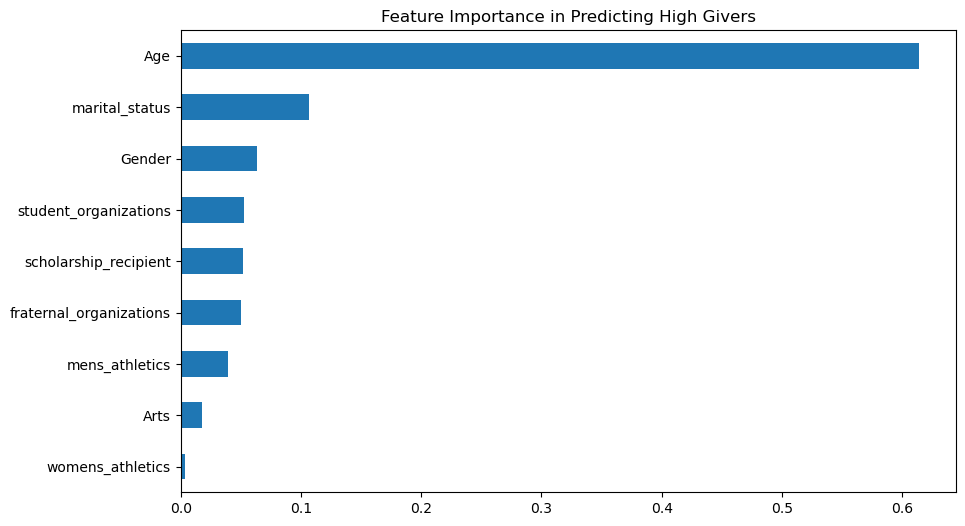

Random Forest Test Accuracy: 0.96
Confusion Matrix:
[[679   3]
 [ 27   2]]
Precision: 0.40
Recall: 0.07
F1 Score: 0.12


In [98]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import pandas as pd

# Step 1: Define the threshold for high lifetime giving
threshold = 10000

# Create a binary target for high givers
donors_grouped['High_Giver_10k'] = donors_grouped['lifetime_giving'].apply(lambda x: 1 if x > threshold else 0)

# Step 2: Select specific features to include in the analysis
features = [
    'Age', 'Gender', 'marital_status', 'Arts',
    'student_organizations', 'fraternal_organizations', 
    'mens_athletics', 'scholarship_recipient', 'womens_athletics'
]

X = donors_grouped[features]  # Select the specified features
y = donors_grouped['High_Giver_10k']  # Target: 1 = high giver, 0 = low giver

# Step 3: Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 4: Train the Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Step 5: Check feature importance
importances = rf.feature_importances_
feature_importance = pd.Series(importances, index=X.columns)

# Plot the feature importance
plt.figure(figsize=(10, 6))
feature_importance.sort_values().plot(kind='barh')
plt.title('Feature Importance in Predicting High Givers')
plt.show()

# Step 6: Evaluate the model on the test set
test_score = rf.score(X_test, y_test)
print(f'Random Forest Test Accuracy: {test_score:.2f}')

# Step 7: Confusion Matrix and Additional Metrics

# Predict on the test set
y_pred = rf.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(cm)

# Precision
precision = precision_score(y_test, y_pred)
print(f'Precision: {precision:.2f}')

# Recall
recall = recall_score(y_test, y_pred)
print(f'Recall: {recall:.2f}')

# F1 Score
f1 = f1_score(y_test, y_pred)
print(f'F1 Score: {f1:.2f}')




In [100]:
print(feature_importance)  # This will show you the importance of each encoded feature


Age                        0.613821
Gender                     0.063370
marital_status             0.106769
Arts                       0.017825
student_organizations      0.052866
fraternal_organizations    0.049915
mens_athletics             0.039590
scholarship_recipient      0.052057
womens_athletics           0.003786
dtype: float64


## Gifts to Superior Fund

In [70]:
# Filter data to include only donors who gave to the 'Superior Fund'
superior_fund_data = alumni_data_cleaned[alumni_data_cleaned['Fund'] == 'Superior Fund']
superior_fund_data.count

<bound method DataFrame.count of        ConstituentID       City State    Postcode        Country  \
19             39070  Elk Mound    WI  54739-9298  United States   
105             9194     Wilton    CT  06897-4639  United States   
106             9194     Wilton    CT  06897-4639  United States   
111            37486     Hudson    WI  54016-7746  United States   
113            37486     Hudson    WI  54016-7746  United States   
...              ...        ...   ...         ...            ...   
49508           6689  Fairbanks    AK  99709-6657  United States   
49509           6689  Fairbanks    AK  99709-6657  United States   
49513           9642   Superior    WI  54880-6539  United States   
49514           9642   Superior    WI  54880-6539  United States   
49515           9642   Superior    WI  54880-6539  United States   

      constituent_type                     constituent_codes  lifetime_giving  \
19          Individual  Alumni (No start date - No end date)         

In [72]:
# Group by 'ConstituentID' and sum the 'Amount' of donations per constituent
# Retain other relevant features, like age, latest gift amount, etc.
superior_fund_grouped = superior_fund_data.groupby('ConstituentID').agg({
    'Amount': 'sum',  # Sum all the donation amounts per constituent
    'first_gift_amount': 'first',  # Keep the first entry found
    'latest_gift_amount': 'first',  # Keep the first entry found
    'greatest_gift_amount': 'first',  # Keep the first entry found
    'Age': 'first', # Keep the first entry found
    'Gender': 'first', # Keep the first entry found
    'lifetime_giving': 'first', # Keep the first entry found
    'first_gift_date': 'first', # Keep the first entry found
    'latest_gift_date': 'first', # Keep the first entry found
    'greatest_gift_date': 'first', # Keep the first entry found
    'marital_status': 'first', # Keep the first entry found
    'Arts': 'first', # Keep the first entry found
    'student_organizations': 'first', # Keep the first entry found
    'fraternal_organizations': 'first', # Keep the first entry found
    'mens_athletics': 'first', # Keep the first entry found
    'scholarship_recipient': 'first', # Keep the first entry found
    'womens_athletics': 'first' # Keep the first entry found
}).reset_index()

In [74]:
# Select features for PCA
numeric_columns = [
    'Amount', 'first_gift_amount', 'lifetime_giving', 'latest_gift_amount', 
    'greatest_gift_amount', 'Age', 'Gender', 'marital_status', 
    'student_organizations', 'fraternal_organizations', 
    'mens_athletics', 'scholarship_recipient', 'womens_athletics'
]

# Filter the selected columns
selected_features = superior_fund_grouped[numeric_columns]

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(selected_features)

# Check the result
print(scaled_data[:5])  # Print the first 5 rows of the standardized data


[[-0.03304531 -0.20028163 -0.07923342 -0.05302507 -0.06563387  0.47250113
   1.05188021 -1.27160086  2.38310022 -0.35898919 -0.29207543 -0.64795105
  -0.17188367]
 [-0.08148654  0.17101494 -0.08736338 -0.06217488 -0.07636783  0.18101785
   1.05188021 -1.27160086 -0.41962146 -0.35898919 -0.29207543  1.54332645
  -0.17188367]
 [-0.06140115 -0.11291773 -0.08099096 -0.05302507 -0.07636783  0.90972605
   1.05188021 -0.10681447  2.38310022 -0.35898919 -0.29207543 -0.64795105
  -0.17188367]
 [-0.08479472 -0.24396358 -0.09228018 -0.0704097  -0.07750086  0.39963031
  -0.94594441  2.2227583  -0.41962146 -0.35898919 -0.29207543  1.54332645
  -0.17188367]
 [-0.08290433 -0.15659968 -0.09184888 -0.06766476 -0.07726232 -0.62056118
  -0.94594441 -1.27160086 -0.41962146 -0.35898919 -0.29207543 -0.64795105
  -0.17188367]]


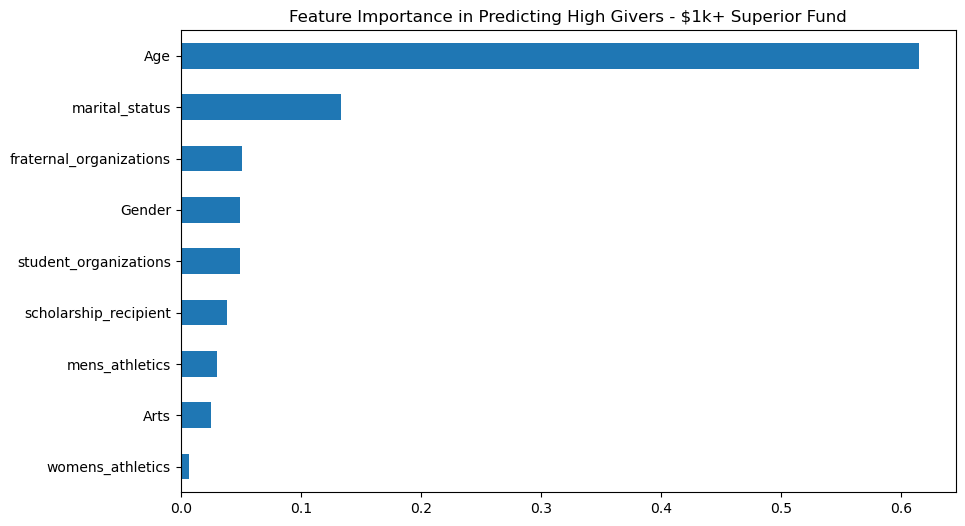

Random Forest Test Accuracy: 0.74
Confusion Matrix:
[[333  37]
 [ 87  24]]
Precision: 0.39
Recall: 0.22
F1 Score: 0.28


In [76]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import pandas as pd

# Step 1: Define the threshold for high lifetime giving
threshold = 1000

# Create a binary target for high givers
superior_fund_grouped['High_Giver_1k'] = superior_fund_grouped['lifetime_giving'].apply(lambda x: 1 if x > threshold else 0)

# Step 2: Select specific features to include in the analysis
features = [
    'Age', 'Gender', 'marital_status', 'Arts',
    'student_organizations', 'fraternal_organizations', 
    'mens_athletics', 'scholarship_recipient', 'womens_athletics'
]

X = superior_fund_grouped[features]  # Select the specified features
y = superior_fund_grouped['High_Giver_1k']  # Target: 1 = high giver, 0 = low giver

# Step 3: Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 4: Train the Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Step 5: Check feature importance
importances = rf.feature_importances_
feature_importance = pd.Series(importances, index=X.columns)

# Plot the feature importance
plt.figure(figsize=(10, 6))
feature_importance.sort_values().plot(kind='barh')
plt.title('Feature Importance in Predicting High Givers - $1k+ Superior Fund')
plt.show()

# Step 6: Evaluate the model on the test set
test_score = rf.score(X_test, y_test)
print(f'Random Forest Test Accuracy: {test_score:.2f}')

# Step 7: Confusion Matrix and Additional Metrics

# Predict on the test set
y_pred = rf.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(cm)

# Precision
precision = precision_score(y_test, y_pred)
print(f'Precision: {precision:.2f}')

# Recall
recall = recall_score(y_test, y_pred)
print(f'Recall: {recall:.2f}')

# F1 Score
f1 = f1_score(y_test, y_pred)
print(f'F1 Score: {f1:.2f}')


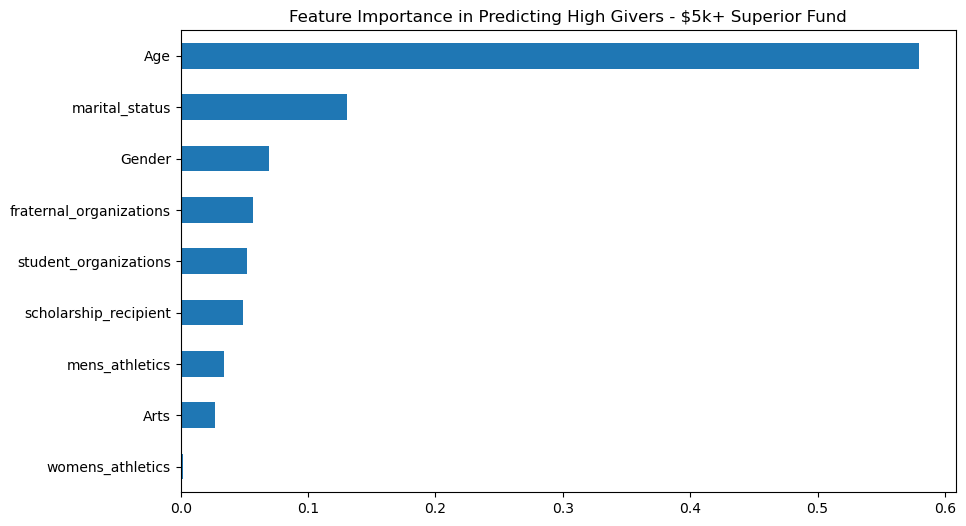

Random Forest Test Accuracy: 0.90
Confusion Matrix:
[[433  17]
 [ 30   1]]
Precision: 0.06
Recall: 0.03
F1 Score: 0.04


In [78]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import pandas as pd

# Step 1: Define the threshold for high lifetime giving
threshold = 5000

# Create a binary target for high givers
superior_fund_grouped['High_Giver_5k'] = superior_fund_grouped['lifetime_giving'].apply(lambda x: 1 if x > threshold else 0)

# Step 2: Select specific features to include in the analysis
features = [
    'Age', 'Gender', 'marital_status', 'Arts',
    'student_organizations', 'fraternal_organizations', 
    'mens_athletics', 'scholarship_recipient', 'womens_athletics'
]

X = superior_fund_grouped[features]  # Select the specified features
y = superior_fund_grouped['High_Giver_5k']  # Target: 1 = high giver, 0 = low giver

# Step 3: Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 4: Train the Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Step 5: Check feature importance
importances = rf.feature_importances_
feature_importance = pd.Series(importances, index=X.columns)

# Plot the feature importance
plt.figure(figsize=(10, 6))
feature_importance.sort_values().plot(kind='barh')
plt.title('Feature Importance in Predicting High Givers - $5k+ Superior Fund')
plt.show()

# Step 6: Evaluate the model on the test set
test_score = rf.score(X_test, y_test)
print(f'Random Forest Test Accuracy: {test_score:.2f}')

# Step 7: Confusion Matrix and Additional Metrics

# Predict on the test set
y_pred = rf.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(cm)

# Precision
precision = precision_score(y_test, y_pred)
print(f'Precision: {precision:.2f}')

# Recall
recall = recall_score(y_test, y_pred)
print(f'Recall: {recall:.2f}')

# F1 Score
f1 = f1_score(y_test, y_pred)
print(f'F1 Score: {f1:.2f}')


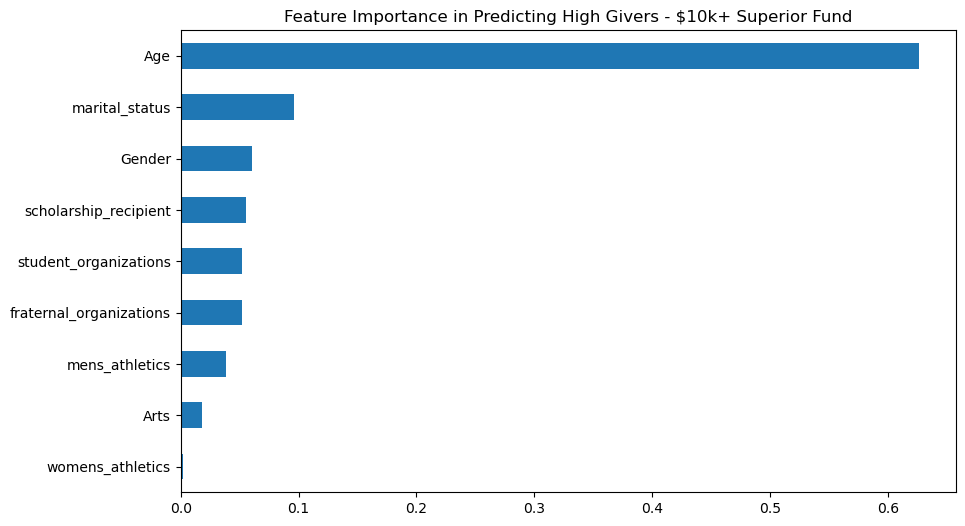

Random Forest Test Accuracy: 0.94
Confusion Matrix:
[[450   9]
 [ 22   0]]
Precision: 0.00
Recall: 0.00
F1 Score: 0.00


In [80]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import pandas as pd

# Step 1: Define the threshold for high lifetime giving
threshold = 10000

# Create a binary target for high givers
superior_fund_grouped['High_Giver_10k'] = superior_fund_grouped['lifetime_giving'].apply(lambda x: 1 if x > threshold else 0)

# Step 2: Select specific features to include in the analysis
features = [
    'Age', 'Gender', 'marital_status', 'Arts',
    'student_organizations', 'fraternal_organizations', 
    'mens_athletics', 'scholarship_recipient', 'womens_athletics'
]

X = superior_fund_grouped[features]  # Select the specified features
y = superior_fund_grouped['High_Giver_10k']  # Target: 1 = high giver, 0 = low giver

# Step 3: Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 4: Train the Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Step 5: Check feature importance
importances = rf.feature_importances_
feature_importance = pd.Series(importances, index=X.columns)

# Plot the feature importance
plt.figure(figsize=(10, 6))
feature_importance.sort_values().plot(kind='barh')
plt.title('Feature Importance in Predicting High Givers - $10k+ Superior Fund')
plt.show()

# Step 6: Evaluate the model on the test set
test_score = rf.score(X_test, y_test)
print(f'Random Forest Test Accuracy: {test_score:.2f}')

# Step 7: Confusion Matrix and Additional Metrics

# Predict on the test set
y_pred = rf.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(cm)

# Precision
precision = precision_score(y_test, y_pred)
print(f'Precision: {precision:.2f}')

# Recall
recall = recall_score(y_test, y_pred)
print(f'Recall: {recall:.2f}')

# F1 Score
f1 = f1_score(y_test, y_pred)
print(f'F1 Score: {f1:.2f}')
